Probelem Definition: Here I outline my polynomial regression works. Then I use that to decompose the total error and decompose it into the variance and bias of the model and outline how the two change with model complexity.

In [75]:
import numpy as np
import matplotlib.pyplot as plt

***Task 1: Data Generation***

In [76]:
X = np.linspace(0, 10, 20)    # defining true data
lin_Y = lambda x: 2*x + 1
quad_Y = lambda x: x**2/4

noise = np.random.normal(loc=0, scale=1, size=X.size) # noise
observed_lin_Y = lin_Y(x=X) + noise    # observed Y values
observed_quad_Y = quad_Y(x=X) + noise

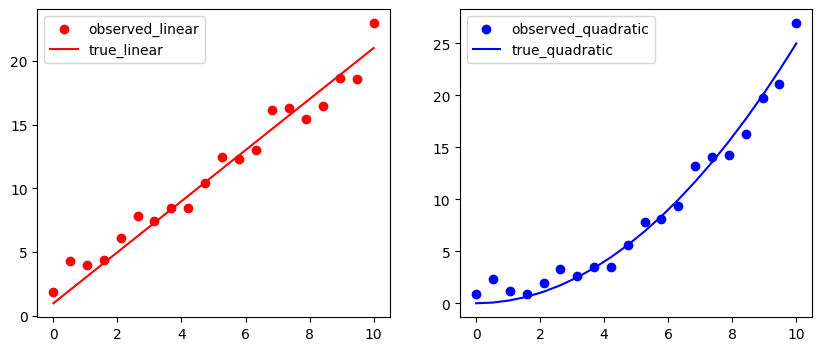

In [77]:
#plotting

fig, axes = plt.subplots(1, 2, figsize=(10, 4))


axes[0].scatter(X, observed_lin_Y, marker='o', c='r', label='observed_linear')
axes[0].plot(X, lin_Y(X), 'r', label='true_linear')
axes[0].legend()

axes[1].scatter(X, observed_quad_Y, marker='o', c='b', label='observed_quadratic')
axes[1].plot(X, quad_Y(X), 'b', label='true_quadratic')
axes[1].legend()
plt.show()


1.) The purpose of adding Gaussian noise is to visualise what error looks like. Since we don't "expect" to make error, we may assume the mean of our errors is zero with little deviation- hence fitting that we sample this from a (Gaussian) Normal distribution.

2.) Visualising both has numerous benefits:
- helps evaluate our models
- helps understand data patterns
- visualises errors and identify outliers.

for example, the errors seem less prominent for the quadratic case (because relative error is lower).

**Task 2: Model Training with Polynomial Regression**

In [78]:
# Regression for degrees 2, 5, 7 and 10 (using np.polyfit()) :

y2_lin = np.polyfit(X, observed_lin_Y, 2)
Y2_lin =  np.polynomial.Polynomial(np.flip(y2_lin))
y2_quad = np.polyfit(X, observed_quad_Y, 2)
Y2_quad = np.polynomial.Polynomial(np.flip(y2_quad))

y5_lin = np.polyfit(X, observed_lin_Y, 5)
Y5_lin = np.polynomial.Polynomial(np.flip(y5_lin))
y5_quad = np.polyfit(X, observed_quad_Y, 5)
Y5_quad = np.polynomial.Polynomial(np.flip(y5_quad))

y7_lin = np.polyfit(X, observed_lin_Y, 7)
Y7_lin = np.polynomial.Polynomial(np.flip(y7_lin))
y7_quad = np.polyfit(X, observed_quad_Y, 7)
Y7_quad = np.polynomial.Polynomial(np.flip(y7_quad))


y10_lin = np.polyfit(X, observed_lin_Y, 10)
Y10_lin = np.polynomial.Polynomial(np.flip(y10_lin))
y10_quad = np.polyfit(X, observed_quad_Y, 10)
Y10_quad = np.polynomial.Polynomial(np.flip(y10_quad))


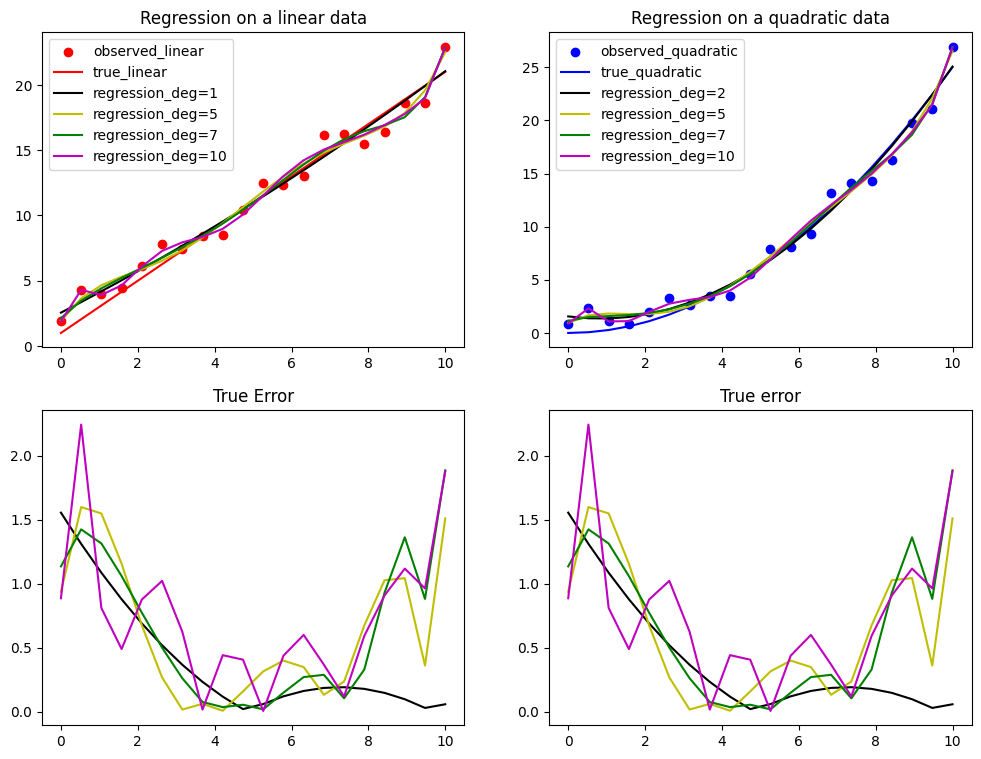

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

axes[0, 0].scatter(X, observed_lin_Y, marker='o', c='r', label='observed_linear')
axes[0, 0].plot(X, lin_Y(X), 'r', label='true_linear')
axes[0, 0].plot(X, Y2_lin(X), 'k', label='regression_deg=1')
axes[0, 0].plot(X, Y5_lin(X), 'y', label='regression_deg=5')
axes[0, 0].plot(X, Y7_lin(X), 'g', label='regression_deg=7')
axes[0, 0].plot(X, Y10_lin(X), 'm', label='regression_deg=10')
axes[0, 0].set_title('Regression on a linear data')
axes[0, 0].legend()

axes[0, 1].scatter(X, observed_quad_Y, marker='o', c='b', label='observed_quadratic')
axes[0, 1].plot(X, quad_Y(X), 'b', label='true_quadratic')
axes[0, 1].plot(X, Y2_quad(X), 'k', label='regression_deg=2')
axes[0, 1].plot(X, Y5_quad(X), 'y', label='regression_deg=5')
axes[0, 1].plot(X, Y7_quad(X), 'g', label='regression_deg=7')
axes[0, 1].plot(X, Y10_quad(X), 'm', label='regression_deg=10')
axes[0, 1].set_title('Regression on a quadratic data')
axes[0, 1].legend()

axes[1, 0].plot(X, abs(lin_Y(X) - Y2_lin(X)), 'k', label='regression_deg=2')
axes[1, 0].plot(X, abs(lin_Y(X) - Y5_lin(X)), 'y', label='regression_deg=5')
axes[1, 0].plot(X, abs(lin_Y(X) - Y7_lin(X)), 'g', label='regression_deg=7')
axes[1, 0].plot(X, abs(lin_Y(X) - Y10_lin(X)), 'm', label='regression_deg=10')
axes[1, 0].set_title('True Error')


axes[1, 1].plot(X, abs(quad_Y(X) - Y2_quad(X)), 'k', label='regression_deg=1')
axes[1, 1].plot(X, abs(quad_Y(X) - Y5_quad(X)), 'y', label='regression_deg=5')
axes[1, 1].plot(X, abs(quad_Y(X) - Y7_quad(X)), 'g', label='regression_deg=7')
axes[1, 1].plot(X, abs(quad_Y(X) - Y10_quad(X)), 'm', label='regression_deg=10')
axes[1, 1].set_title('True error')


plt.show()

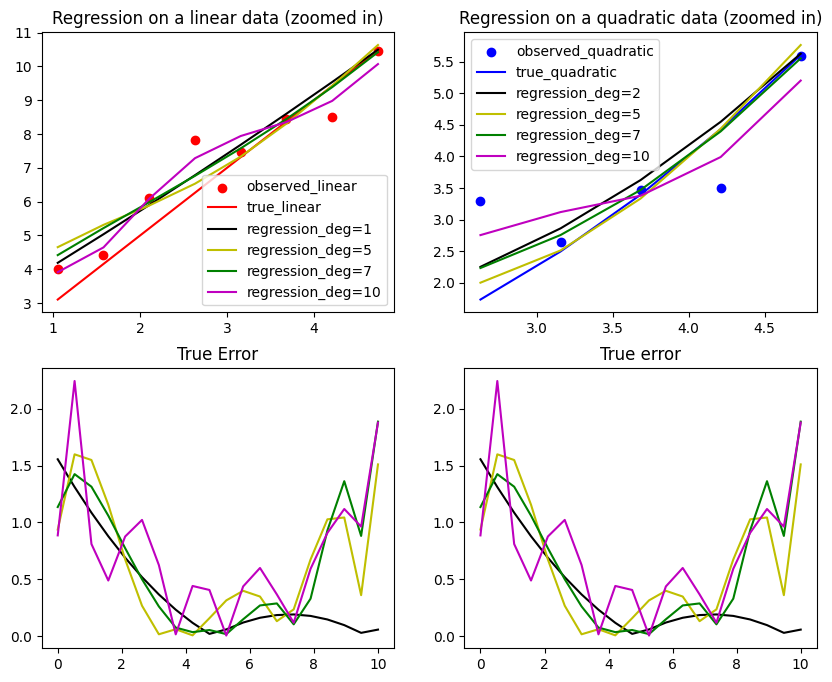

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].scatter(X[2:10], observed_lin_Y[2:10], marker='o', c='r', label='observed_linear')
axes[0, 0].plot(X[2:10], lin_Y(X)[2:10], 'r', label='true_linear')
axes[0, 0].plot(X[2:10], Y2_lin(X)[2:10], 'k', label='regression_deg=1')
axes[0, 0].plot(X[2:10], Y5_lin(X)[2:10], 'y', label='regression_deg=5')
axes[0, 0].plot(X[2:10], Y7_lin(X)[2:10], 'g', label='regression_deg=7')
axes[0, 0].plot(X[2:10], Y10_lin(X)[2:10], 'm', label='regression_deg=10')
axes[0, 0].set_title('Regression on a linear data (zoomed in)')
axes[0, 0].legend()

axes[0, 1].scatter(X[5:10], observed_quad_Y[5:10], marker='o', c='b', label='observed_quadratic')
axes[0, 1].plot(X[5:10], quad_Y(X)[5:10], 'b', label='true_quadratic')
axes[0, 1].plot(X[5:10], Y2_quad(X)[5:10], 'k', label='regression_deg=2')
axes[0, 1].plot(X[5:10], Y5_quad(X)[5:10], 'y', label='regression_deg=5')
axes[0, 1].plot(X[5:10], Y7_quad(X)[5:10], 'g', label='regression_deg=7')
axes[0, 1].plot(X[5:10], Y10_quad(X)[5:10], 'm', label='regression_deg=10')
axes[0, 1].set_title('Regression on a quadratic data (zoomed in)')
axes[0, 1].legend()

axes[1, 0].plot(X, abs(lin_Y(X) - Y2_lin(X)), 'k', label='regression_deg=2')
axes[1, 0].plot(X, abs(lin_Y(X) - Y5_lin(X)), 'y', label='regression_deg=5')
axes[1, 0].plot(X, abs(lin_Y(X) - Y7_lin(X)), 'g', label='regression_deg=7')
axes[1, 0].plot(X, abs(lin_Y(X) - Y10_lin(X)), 'm', label='regression_deg=10')
axes[1, 0].set_title('True Error')


axes[1, 1].plot(X, abs(quad_Y(X) - Y2_quad(X)), 'k', label='regression_deg=1')
axes[1, 1].plot(X, abs(quad_Y(X) - Y5_quad(X)), 'y', label='regression_deg=5')
axes[1, 1].plot(X, abs(quad_Y(X) - Y7_quad(X)), 'g', label='regression_deg=7')
axes[1, 1].plot(X, abs(quad_Y(X) - Y10_quad(X)), 'm', label='regression_deg=10')
axes[1, 1].set_title('True error')


plt.show()

1.) A polynomial regression model uses a polynomial function of degree n (2, 5, 7 and 10 in our case) to fit the data instead of a linear function.

2.) As the degree of the polynomial increases, the model becomes more complex and flexible. This leads to a lower bias and high variance due to being very good at creating low error within the training set (many points of 0 error) but doesn't produce nearly the same level of results with a testing set (overfitting).

**Task 3: Bias-Variance Decomposition**

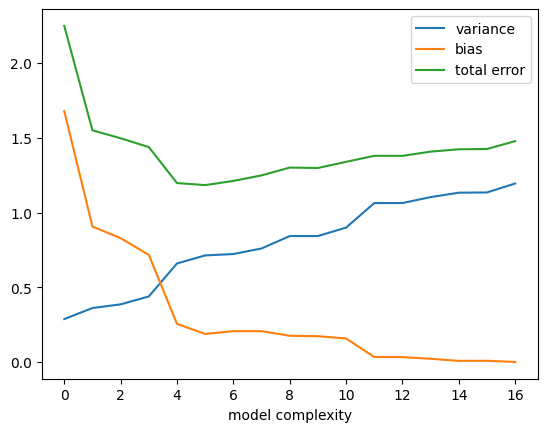

In [81]:
from random import sample

def bias_variance_decomp(X, Y, Y_true, degree, bootstrap=100):
  data_lin = Y

  error = []
  bias = []

  index = [i for i in range(len(Y))]

  for b in range(bootstrap):
    boot = sample(index, len(Y))
    b_sample = [Y[boot[j]] for j in range(len(boot))]
    X_val = [X[boot[j]] for j in range(len(boot))]

    lin_model = np.polyfit(X_val, b_sample, degree)
    lin_Y_boot = np.polynomial.Polynomial(np.flip(lin_model))
    error.append((lin_Y_boot(X) - Y)**2)
    bias.append((Y_true - lin_Y_boot(X))**2)

  return np.array(error).mean(), np.array(error).var(axis=1).mean(), np.array(bias).mean(axis=0).mean()

error = []
bias_ = []
var_ = []

for complexity in range(1, len(X)-2):
  e, v, b = bias_variance_decomp(X, observed_lin_Y, lin_Y(X), complexity)
  error.append(e)
  bias_.append(b)
  var_.append(v)

#plt.plot(error, label='error')
plt.plot(bias_, label='variance')
plt.plot(var_, label='bias')
plt.plot((np.array(bias_) + np.array(var_)+ noise.mean()), label='total error')
plt.xlabel('model complexity')
plt.legend()
plt.show()